In [244]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos y exploración inicial
- Cargo el archivo excel con todas las hojas al mismo tiempo

In [245]:
Internet = '../datasets/Internet.xlsx'
data = pd.read_excel(Internet, sheet_name=None)

- Realizo una copia del dataset

In [246]:
data_copy4 = data.copy()

- Exploro el diccionario con todas las hojas guardadas

In [247]:
data_copy4.keys()

dict_keys(['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos '])

Encuentro en 4 hojas del archivo Internet que tienen la columna 'periodo' en comun, procedo a unirlos para generar mi analisis con un kpi y posterior dashboard

In [248]:
df_tapt_4 = data_copy4['Totales Accesos Por Tecnología']
df_pt_4 = data_copy4['Penetracion-totales']
df_tdbaf_4 = data_copy4['Totales Dial-BAf']
df_ing_4 = data_copy4['Ingresos ']
df_vmd_4 = data_copy4['Totales VMD']

- Observando el excel de manera manual, existe una celda donde el año y el periodo no es real

In [249]:
df_ing_4

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2033,2,1.180603e+08,Jun-Mar 2023
4,2023,1,1.041350e+08,Ene-Mar 2023
5,2022,4,7.244348e+07,Oct-Dic 2022
6,2022,3,6.408678e+07,Jul-Sept 2022
7,2022,2,6.041950e+07,Abr-Jun 2022
8,2022,1,5.521931e+07,Ene-Mar 2022
9,2021,4,4.546789e+07,Oct-Dic 2021


- Modifico la celda para poder unir todos los df

In [250]:
# Modifico el año
df_ing_4.iloc[3, 0] = 2023

In [251]:
# Modifico el periodo
df_ing_4.iloc[3, 3] = 'Abr-Jun 2023'

- Verifico el cambio

In [252]:
df_ing_4

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Abr-Jun 2023
4,2023,1,1.041350e+08,Ene-Mar 2023
5,2022,4,7.244348e+07,Oct-Dic 2022
6,2022,3,6.408678e+07,Jul-Sept 2022
7,2022,2,6.041950e+07,Abr-Jun 2022
8,2022,1,5.521931e+07,Ene-Mar 2022
9,2021,4,4.546789e+07,Oct-Dic 2021


Tambien detecto que en el df_vmd_4 la columna que tiene los mismos datos que la columna Periodo del resto no se llama como tal, procedo a cambiarlo para unificarlo

In [253]:
# Modifico el nombre de la columna
df_vmd_4.rename(columns={'Trimestre.1': 'Periodo'}, inplace=True)

In [254]:
df_vmd_4

,Año,Trimestre,Mbps (Media de bajada),Periodo
0,2024,1,139.150000,Ene-Mar 2024
1,2023,4,139.040000,Oct-Dic 2023
2,2023,3,129.670000,Jul-Sept 2023
3,2023,2,123.950000,Abr-Jun 2023
4,2023,1,110.500000,Ene-Mar 2023
5,2022,4,106.560000,Oct-Dic 2022
6,2022,3,62.460000,Jul-Sept 2022
7,2022,2,58.440000,Abr-Jun 2022
8,2022,1,55.110000,Ene-Mar 2022
9,2021,4,52.340000,Oct-Dic 2021


### Realizo las uniones de los distintos dataframe

In [255]:
# Uno los primero 2 df
df_merged = pd.merge(df_tapt_4, df_pt_4, on='Periodo', how='left', suffixes=('_df1', '_df2'))

In [256]:
# Uno el tercer df con el primero y segundo
df_merged = pd.merge(df_merged, df_tdbaf_4, on='Periodo', how='left', suffixes=('', '_df3'))

In [257]:
# Uno el cuarto df con el primero, segundo y tercero
df_merged = pd.merge(df_merged, df_ing_4, on='Periodo', how='left', suffixes=('', '_df4'))

In [258]:
# Uno el quinto df con el primero, segundo, tercero y cuarto
df_merged_final = pd.merge(df_merged, df_vmd_4, on='Periodo', how='left', suffixes=('', '_df4'))

In [259]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año_df1                       41 non-null     int64  
 1   Trimestre_df1                 41 non-null     int64  
 2   ADSL                          41 non-null     int64  
 3   Cablemodem                    41 non-null     int64  
 4   Fibra óptica                  41 non-null     int64  
 5   Wireless                      41 non-null     int64  
 6   Otros                         41 non-null     int64  
 7   Total                         41 non-null     int64  
 8   Periodo                       41 non-null     object 
 9   Año_df2                       41 non-null     int64  
 10  Trimestre_df2                 41 non-null     int64  
 11  Accesos por cada 100 hogares  41 non-null     float64
 12  Accesos por cada 100 hab      41 non-null     float64
 13  Año    

In [260]:
df_merged_final.columns

Index(['Año_df1', 'Trimestre_df1', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total', 'Periodo', 'Año_df2', 'Trimestre_df2',
       'Accesos por cada 100 hogares', 'Accesos por cada 100 hab', 'Año',
       'Trimestre', 'Banda ancha fija', 'Dial up', 'Total_df3', 'Año_df4',
       'Trimestre_df4', 'Ingresos (miles de pesos)', 'Año_df4',
       'Trimestre_df4', 'Mbps (Media de bajada)'],
      dtype='object')

In [261]:
# Lista de columnas que voy a eliminar porque son repeditas
columnas_a_eliminar = ['Año_df1', 'Trimestre_df1', 'Año_df2', 'Trimestre_df2', 'Total_df3', 'Año_df4', 'Trimestre_df4', 'Año_df4', 'Trimestre_df4']

# Eliminar columnas
df_merged_limpio = df_merged_final.drop(columns=columnas_a_eliminar)

In [262]:
print(df_merged_limpio)
print(df_merged_limpio.shape)

       ADSL  Cablemodem  Fibra óptica  Wireless   Otros     Total  \
0    774475     5986957       4015101    598682  257941  11633156   
1    836390     6022532       3908183    585760  194796  11547661   
2    897895     6018832       3708718    581436  200027  11406908   
3   1006509     5997149       3463988    581823  202428  11251897   
4   1204417     6002582       3243411    576647  214838  11241895   
5   1315373     6037457       3060575    572969  221740  11208114   
6   1395277     6031970       2871541    557110  235230  11091128   
7   1468333     5979214       2723285    556243  231609  10958684   
8   1533240     6073426       2219533    545814  251996  10624009   
9   1657615     5984240       2072236    523107  252596  10489794   
10  1950631     5826257       1566048    492415  250190  10085541   
11  2018587     5641731       1472246    476968  253552   9863084   
12  2175211     5424782       1362976    434548  250455   9647972   
13  2213949     5371824       1311

In [263]:
df_merged_limpio

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo,Accesos por cada 100 hogares,Accesos por cada 100 hab,Año,Trimestre,Banda ancha fija,Dial up,Ingresos (miles de pesos),Mbps (Media de bajada)
0,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024,78.890000,24.790000,2024,1,11621363,11793,2.804191e+08,139.150000
1,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023,78.560000,24.660000,2023,4,11535868,11793,1.673760e+08,139.040000
2,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023,77.840000,24.410000,2023,3,11395115,11793,1.331066e+08,129.670000
3,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023,77.020000,24.140000,2023,2,11239781,12116,1.180603e+08,123.950000
4,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023,77.200000,24.170000,2023,1,11229459,12436,1.041350e+08,110.500000
5,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022,77.210000,24.150000,2022,4,11195668,12446,7.244348e+07,106.560000
6,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022,76.640000,23.950000,2022,3,11078691,12437,6.408678e+07,62.460000
7,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022,75.965424,23.720442,2022,2,10946248,12436,6.041950e+07,58.440000
8,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022,73.878803,23.049171,2022,1,10611390,12619,5.521931e+07,55.110000
9,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021,73.176397,22.810702,2021,4,10476933,12861,4.546789e+07,52.340000


In [264]:
df_merged_limpio.isna().sum()

ADSL                            0
Cablemodem                      0
Fibra óptica                    0
Wireless                        0
Otros                           0
Total                           0
Periodo                         0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Año                             0
Trimestre                       0
Banda ancha fija                0
Dial up                         0
Ingresos (miles de pesos)       0
Mbps (Media de bajada)          0
dtype: int64

# Comienzo mi analisis según el KPI propuesto por Henry

Importo las librería necesaria:

In [265]:
from sklearn.cluster import KMeans

Selecciono las columnas relevantes

In [266]:
caracteristicas_relevantes = df_merged_limpio[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab', 'Año', 'Trimestre']]

In [267]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
df_normalized = scaler.fit_transform(caracteristicas_relevantes)

- Aplicar K-means Clustering

Primero, uso la técnica del codo para determinar el número óptimo de clusters.

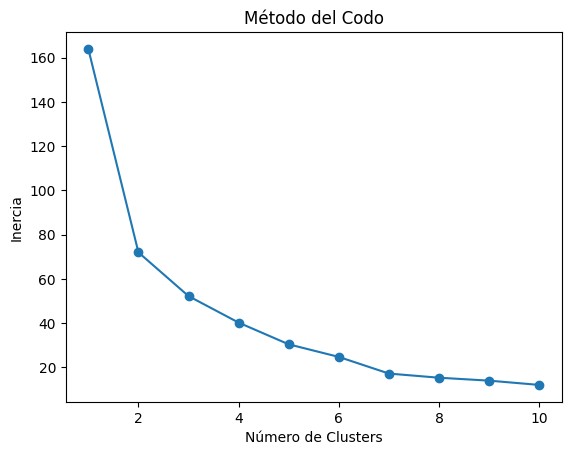

In [268]:
# Calcular la inercia para diferentes valores de K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_normalized)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

Entreno el modelo K-means: Basándome en el gráfico anterior, selecciono el número adecuado de clusters (3 clusters).

In [269]:
# Asumiendo que el número óptimo de clusters es 3
kmeans = KMeans(n_clusters=2, random_state=0)
df_merged_limpio['Cluster'] = kmeans.fit_predict(df_normalized)

Exploro los clusters: Agrupa los datos por los clusters para entender las características de cada grupo.

In [270]:
cluster_summary = df_merged_limpio.groupby('Cluster')
print(cluster_summary)

Visualiza los clusters:
Usa un gráfico de dispersión para visualizar cómo se agrupan las provincias según los accesos e ingresos.

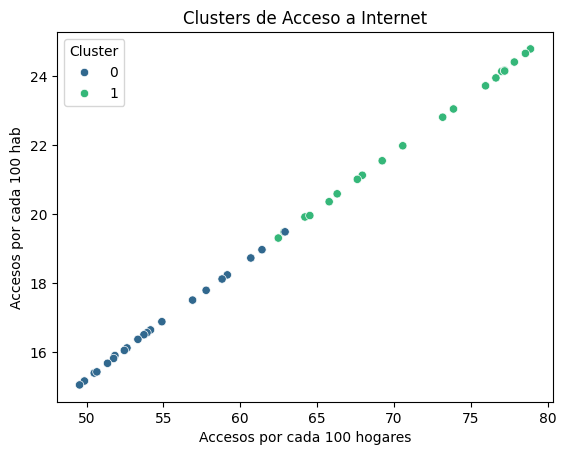

In [271]:
sns.scatterplot(x='Accesos por cada 100 hogares', y='Accesos por cada 100 hab', hue='Cluster', data=df_merged_limpio, palette='viridis')
plt.title('Clusters de Acceso a Internet')
plt.show()

## Para continuar con el KPI propuesto por Henry

- Graficar y medir el KPI propuesto a continuación, representándolo adecuadamente en el dashboard. El KPI propuesto es:

## Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. La fórmula es la siguiente:
K
P
I
=
(
(
N
u
e
v
o
a
c
c
e
s
o
−
A
c
c
e
s
o
a
c
t
u
a
l
)
/
A
c
c
e
s
o
a
c
t
u
a
l
)
∗
100

Donde:

"Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
"Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.
Esta fórmula te ayudará a calcular el KPI para medir el aumento en el acceso a Internet por cada 100 hogares en cada provincia.

Ejemplo de uso:

KPI = ((510 - 500) / 500) * 100 = 2%

Esto indicaría un aumento del 2% en el acceso a Internet en esa provincia para el próximo trimestre.

## Creo las formulas para medir el KPI

In [272]:
# Aumento en un 2% el acceso actual
df_merged_limpio['Nuevo Acceso'] = df_merged_limpio['Accesos por cada 100 hogares'] * 1.02

In [273]:
# Cálculo del KPI
df_merged_limpio['KPI_2%'] = ((df_merged_limpio['Nuevo Acceso'] - df_merged_limpio['Accesos por cada 100 hogares']) / df_merged_limpio['Accesos por cada 100 hogares']) * 100
df_merged_limpio['KPI_2%'] = df_merged_limpio['KPI_2%'].round(2)


In [274]:
df_merged_limpio.dtypes

ADSL                              int64
Cablemodem                        int64
Fibra óptica                      int64
Wireless                          int64
Otros                             int64
Total                             int64
Periodo                          object
Accesos por cada 100 hogares    float64
Accesos por cada 100 hab        float64
Año                               int64
Trimestre                         int64
Banda ancha fija                  int64
Dial up                           int64
Ingresos (miles de pesos)       float64
Mbps (Media de bajada)          float64
Cluster                           int32
Nuevo Acceso                    float64
KPI_2%                          float64
dtype: object

Todos las columnas del tipo float64 los formateo para que tengan 2 difitos

In [275]:
# Redondear todas las columnas float64 a 2 dígitos decimales
df_merged_limpio = df_merged_limpio.round(2)

# Asegurarse de que las columnas int se muestren como enteros puros
#df_merged_limpio = df_merged_limpio.applymap(lambda x: int(x) if isinstance(x, float) and x.is_integer() else x)


In [276]:
df_merged_limpio

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo,Accesos por cada 100 hogares,Accesos por cada 100 hab,Año,Trimestre,Banda ancha fija,Dial up,Ingresos (miles de pesos),Mbps (Media de bajada),Cluster,Nuevo Acceso,KPI_2%
0,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024,78.89,24.79,2024,1,11621363,11793,2.804191e+08,139.15,1,80.47,2.0
1,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023,78.56,24.66,2023,4,11535868,11793,1.673760e+08,139.04,1,80.13,2.0
2,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023,77.84,24.41,2023,3,11395115,11793,1.331066e+08,129.67,1,79.40,2.0
3,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023,77.02,24.14,2023,2,11239781,12116,1.180603e+08,123.95,1,78.56,2.0
4,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023,77.20,24.17,2023,1,11229459,12436,1.041350e+08,110.50,1,78.74,2.0
5,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022,77.21,24.15,2022,4,11195668,12446,7.244348e+07,106.56,1,78.75,2.0
6,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022,76.64,23.95,2022,3,11078691,12437,6.408678e+07,62.46,1,78.17,2.0
7,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022,75.97,23.72,2022,2,10946248,12436,6.041950e+07,58.44,1,77.48,2.0
8,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022,73.88,23.05,2022,1,10611390,12619,5.521931e+07,55.11,1,75.36,2.0
9,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021,73.18,22.81,2021,4,10476933,12861,4.546789e+07,52.34,1,74.64,2.0


In [277]:
df_merged_limpio.dtypes

ADSL                              int64
Cablemodem                        int64
Fibra óptica                      int64
Wireless                          int64
Otros                             int64
Total                             int64
Periodo                          object
Accesos por cada 100 hogares    float64
Accesos por cada 100 hab        float64
Año                               int64
Trimestre                         int64
Banda ancha fija                  int64
Dial up                           int64
Ingresos (miles de pesos)       float64
Mbps (Media de bajada)          float64
Cluster                           int32
Nuevo Acceso                    float64
KPI_2%                          float64
dtype: object

- Muestro cómo han evolucionado los accesos a Internet por cada 100 hogares a lo largo de los trimestres.

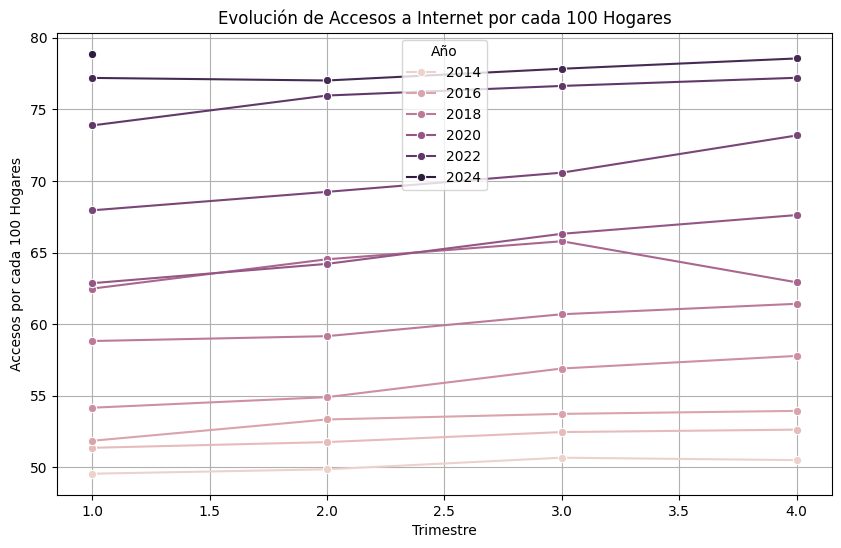

In [278]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Trimestre', y='Accesos por cada 100 hogares', hue='Año', data=df_merged_limpio, marker='o')
plt.title('Evolución de Accesos a Internet por cada 100 Hogares')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 Hogares')
plt.legend(title='Año')
plt.grid(True)
plt.show()

Comparo las diferentes tecnologías de acceso (ADSL, Cablemodem, etc.) entre trimestres.

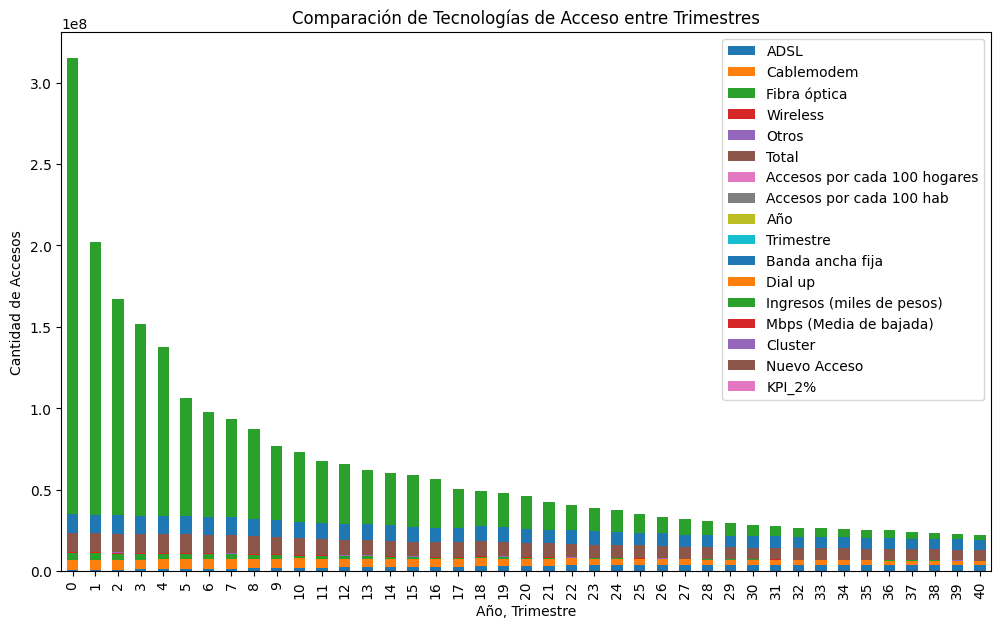

In [279]:
df_merged_limpio.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Comparación de Tecnologías de Acceso entre Trimestres')
plt.xlabel('Año, Trimestre')
plt.ylabel('Cantidad de Accesos')
plt.show()

# Exporto el archivo para realizar mi KPI en el dashboard

In [280]:
# Exporto mi dataset a un archivo csv en la carpeta dataset/procesado
df_merged_limpio.to_csv('../datasets/procesado/acctec_hogares_mediabajada_ingresos.csv', index=False)

In [281]:
df_merged_limpio

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo,Accesos por cada 100 hogares,Accesos por cada 100 hab,Año,Trimestre,Banda ancha fija,Dial up,Ingresos (miles de pesos),Mbps (Media de bajada),Cluster,Nuevo Acceso,KPI_2%
0,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024,78.89,24.79,2024,1,11621363,11793,2.804191e+08,139.15,1,80.47,2.0
1,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023,78.56,24.66,2023,4,11535868,11793,1.673760e+08,139.04,1,80.13,2.0
2,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023,77.84,24.41,2023,3,11395115,11793,1.331066e+08,129.67,1,79.40,2.0
3,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023,77.02,24.14,2023,2,11239781,12116,1.180603e+08,123.95,1,78.56,2.0
4,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023,77.20,24.17,2023,1,11229459,12436,1.041350e+08,110.50,1,78.74,2.0
5,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022,77.21,24.15,2022,4,11195668,12446,7.244348e+07,106.56,1,78.75,2.0
6,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022,76.64,23.95,2022,3,11078691,12437,6.408678e+07,62.46,1,78.17,2.0
7,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022,75.97,23.72,2022,2,10946248,12436,6.041950e+07,58.44,1,77.48,2.0
8,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022,73.88,23.05,2022,1,10611390,12619,5.521931e+07,55.11,1,75.36,2.0
9,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021,73.18,22.81,2021,4,10476933,12861,4.546789e+07,52.34,1,74.64,2.0
